MovieWriter imagemagick unavailable. Trying to use pillow instead.


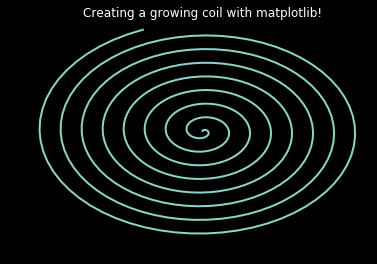

In [25]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
plt.style.use('dark_background')

fig = plt.figure() 
ax = plt.axes(xlim=(-50, 50), ylim=(-50, 50)) 
line, = ax.plot([], [], lw=2) 
# initialization function 
def init(): 
	# creating an empty plot/frame 
	line.set_data([], []) 
	return line, 

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i): 
	# t is a parameter 
	t = 0.1*i 
	
	# x, y values to be plotted 
	x = t*np.sin(t) 
	y = t*np.cos(t) 
	
	# appending new points to x, y axes points list 
	xdata.append(x) 
	ydata.append(y) 
	line.set_data(xdata, ydata) 
	return line, 

# setting a title for the plot 
plt.title('Creating a growing coil with matplotlib!') 
# hiding the axis details 
plt.axis('off') 

# call the animator
anim2 = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=500, interval=20, blit=True) 
anim2.save('./img/coil.gif', dpi=40, writer='imagemagick') 

<img src = './img/coil.gif'>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.animation import FuncAnimation

https://nbviewer.jupyter.org/github/SkalskiP/ILearnDeepLearning.py/blob/master/02_data_science_toolkit/01_animated_graphs/Advanced%20Visualisation%20of%20Lorenz%20Attractor.ipynb

In [2]:
# length of the time step
DELTA_T = 0.01
# number of time steps
STEPS = 1500
# number of model time steps per animation frame
STEPS_PER_FRAME = 5
# plot padding
PADDING = 2.5
# output directory (the folder must be created on the drive)
OUTPUT_DIR = "lorenz_attractor"

In [3]:
# Auxiliary function calculating derivatives of successive co-ordinates
def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

# Function that calculates points belonging to the trajectory, for a specified starting point and time step
def build_lorenz_trajectory(dt, steps, initial_values=(0., 1., 1.05), s=10, r=28, b=2.667):
    xs = np.empty((steps + 1,))
    ys = np.empty((steps + 1,))
    zs = np.empty((steps + 1,))
    
    xs[0], ys[0], zs[0] = initial_values
    
    for i in range(steps):
        x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
        
    return (xs, ys, zs)

In [4]:
# create a blank 3D chart with styling
def create_blank_chart_with_styling(data, ax_padding, plot_size):
    # my favorite styling kit
    plt.style.use('dark_background')
    # determining the size of the graph
    fig = plt.figure(figsize=plot_size)
    # 3D mode
    ax = fig.gca(projection='3d')
    # transparent axis pane background 
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    # setting chart axis names
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    
    xs = np.array([])
    ys = np.array([])
    zs = np.array([])
    
    for trajectory in data:
        xs = np.append(xs, trajectory[0])
        ys = np.append(ys, trajectory[1])
        zs = np.append(zs, trajectory[2])
    
    ax.set_xlim3d(xs.min() - ax_padding, xs.max() + ax_padding)
    ax.set_ylim3d(ys.min() - ax_padding, ys.max() + ax_padding)
    ax.set_zlim3d(zs.min() - ax_padding, zs.max() + ax_padding)
    return (fig, ax)

In [5]:
initial_conditions = [
    (0., 1., 1.05),
    (0., 1., 1.06),
    (0., 1., 1.07),
]
colors = [
    "#99b898",
    "#fecea8",
    "#e84a5f",
]

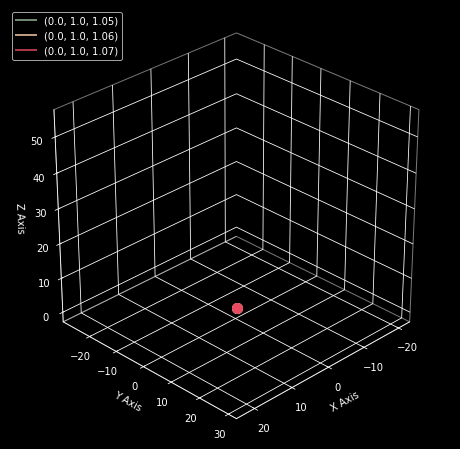

In [6]:
# Calculation of the points belonging to the three trajectories, based on the given starting conditions
plots_data = [build_lorenz_trajectory(DELTA_T, STEPS, 
    initial_values=initial_conditions[i]) for i in range(3)]

# Creation of an empty chart
fig, ax = create_blank_chart_with_styling(plots_data, PADDING, (8, 8))

# Setting up (for the time being empty) data sequences
plots = [ax.plot([],[],[], color=colors[i], label=str(initial_conditions[i]),
    lw=2, alpha=0.75, animated=True)[0] for i in range(3)]

# Each trajectory starts with a point moving in space
dots = [ax.scatter([],[],[], s=100, c=colors[i], animated=True) for i in range(3)]

# Updating chart
def update(i):
    frame_end = (i + 1) * STEPS_PER_FRAME
    for plot, dot, data in zip(plots, dots, plots_data):
        xs, ys, zs = data
        # Updating the trajectory
        plot.set_data(xs[:frame_end], ys[:frame_end])
        plot.set_3d_properties(zs[:frame_end])
        # Updating the position of dots
        dot._offsets3d = ([xs[frame_end]], [ys[frame_end]], [zs[frame_end]])
        
    # Adding a legend
    ax.legend(loc=2, prop={'size': 10})
    # Rotating the chart
    ax.view_init(30, 45 + i)
        
# Animation creation
anim = FuncAnimation(fig, update, frames=np.arange(0, int(STEPS/STEPS_PER_FRAME)), interval=40)


In [8]:
# Saving animation
anim.save('./img/lorenz_attractor_short.gif', dpi=80, writer='imagemagick')

MovieWriter imagemagick unavailable. Trying to use pillow instead.


<img src = './img/lorenz_attractor_short.gif'>

In [11]:
!pip install celluloid

  Could not find a version that satisfies the requirement celluloid (from versions: )
No matching distribution found for celluloid
You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
from matplotlib import pyplot as plt
from celluloid import Camera

fig = plt.figure()
camera = Camera(fig)
for i in range(10):
    plt.plot([i] * 10)
    camera.snap()
animation = camera.animate()
animation.save('celluloid_minimal.gif', writer = 'imagemagick')